In [1]:
import pandas as pd
import sqlite3

# Load the cleaned CSV
df = pd.read_csv("C:/Users/manav/Desktop/cleaned_data.csv")

# Show preview
df.head()


,flightnumber,date,boosterversion,payloadmass,orbit,launchsite,outcome,flights,gridfins,reused,legs,landingpad,block,reusedcount,serial,longitude,latitude
0,1,6/4/2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857


In [2]:
# Create SQLite connection in memory (or save to a file)
conn = sqlite3.connect(':memory:')  # Or use "data/landing_data.db"

# Save dataframe to SQL table
df.to_sql("spacex", conn, index=False, if_exists="replace")


90

## ✅ Query 1: Count how many landings used gridfins


In [3]:
query = """
SELECT gridfins, COUNT(*) as total
FROM spacex
GROUP BY gridfins
"""
pd.read_sql(query, conn)


,gridfins,total
0,0,20
1,1,70


## ✅ Query 2: Average reused count by landing pad


In [4]:
query = """
SELECT landingpad, AVG(reusedcount) as avg_reused
FROM spacex
GROUP BY landingpad
ORDER BY avg_reused DESC
"""
pd.read_sql(query, conn)


,landingpad,avg_reused
0,5e9e3032383ecb554034e7c9,8.000000
1,5e9e3033383ecbb9e534e7cc,5.076923
2,5e9e3032383ecb6bb234e7ca,4.684211
3,5e9e3032383ecb267a34e7c7,1.227273
4,5e9e3032383ecb761634e7cb,0.000000
5,None,0.000000


## ✅ Query 3: Top reused booster serials


In [5]:
query = """
SELECT serial, MAX(reusedcount) as max_reuse
FROM spacex
GROUP BY serial
ORDER BY max_reuse DESC
LIMIT 5
"""
pd.read_sql(query, conn)


,serial,max_reuse
0,B1058,13
1,B1060,12
2,B1051,12
3,B1049,9
4,B1062,8


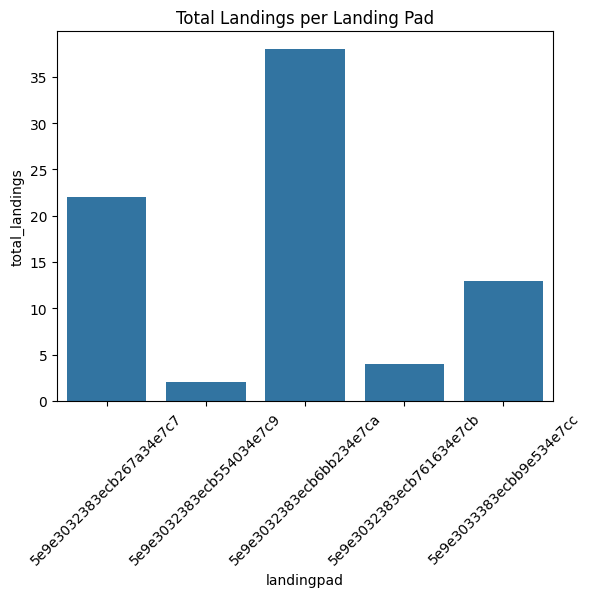

In [6]:
query = """
SELECT landingpad, COUNT(*) as total_landings
FROM spacex
GROUP BY landingpad
"""
df_landingpad = pd.read_sql(query, conn)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="landingpad", y="total_landings", data=df_landingpad)
plt.title("Total Landings per Landing Pad")
plt.xticks(rotation=45)
plt.show()
